# CSCE 623 Homework Assignment 3


### Student Name:  TODD, MICHAEL, Maj, USAF

### Date: April 25, 2023

### Binary Classification in 2-feature datasets

Instructions:
* Review all provided code before starting your work - this instructor has provided hints and tips throughout the code
* This assignment is composed of 2 parts
    * Load, split, and explore the data
    * Fit models and evaluate performance
* Complete the 12 numbered STEPS which contain (STUDENT CODE REQUIRED) and (STUDENT MARKDOWN RESPONSE REQUIRED) activities
* Remember to restart the kernel and rerun all cells before submitting the assignment
* Submit only the Jupyter Notebook (.ipynb) file - do not submit the datasets.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.colors as col

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.metrics import accuracy_score, roc_curve, roc_auc_score, RocCurveDisplay
from sklearn.metrics import ConfusionMatrixDisplay

from IPython.display import Markdown as md

## OPTIONAL STUDENT CODE

If you need any additional imports not listed above, import them below so that the instructor is aware of what additional imports you are using

In [2]:
#------------- START STUDENT CODE HERE -------------------

# student package import statements here if needed

from sklearn.metrics import confusion_matrix

#------------- END STUDENT CODE HERE -------------------


# Part 1 - Load, explore, and discuss the datasets (steps 1-7)

Each dataset is stored in a Comma Separated Value (CSV) file.  The first row is a header row.  After the first row, each row is an observation, the first 2 columns are features ("X1" and "X2" and the third column is a classification category (encoded as 0 or 1)

In this part, you will perform several actions repeatedly on each of 3 datasets to load, split, and explore the data.  



## STEP 1 (DATASET 1):  Load Dataset 1 (STUDENT CODE)

Ensure that the data sets (e.g., `dataset1.csv`) is in the same directory as your code.  Then accomplish the next two actions in the code cell below

Load the data using `pandas` function `read_csv`.   
* Use the `header` parameter to indicate row 0 as a header row
* Use the `names` parameter to name the 2 features `X1` and `X2` and the third column as `Class`
* Use the `index_col` parameter to tell the function that column 0 is the index

Use `sklearn` to partition the data into test and training sets (`df1_train` and `df1_test`):
* The sets must be of exactly equal size 
* The train and test sets must each have the *exact proportion of class distributions* which were present in the full set before the split (if the percentage was Class0 = A and Class1=B, then those same percentages must be in the training set and in the test set).

Hint1:  Loading and splitting each require only one line of code.   Instead of making up your own way of achieving the desired result, it is recommened to review the APIs and examples on the internet.

Hint2:  If you are using loops, breaking things apart then joining them back together, counting class memberships or doing other things besides a single call to the appropriate package, then you are probably being inefficient.



In [3]:
# STEP 1

df1 = None #placeholder to load the dataframe in
df1_train = None #placeholder for training set partition
df1_test = None #placeholder for test set partition
randstate = 42

#------------- START STUDENT CODE HERE -------------------

# read in dataset1.csv
df1 = pd.read_csv("dataset1.csv", header=0, names=['X1', 'X2', 'Class'], index_col=0)

# Split data into two equal groups for training and testing maintaining class distributions
df1_train, df1_test = train_test_split(df1, test_size=0.5, random_state=randstate, stratify=df1['Class'])

#------------- END STUDENT CODE HERE -------------------

## STEP 2: Create a reusable function for data exploration (STUDENT CODE)

Create a `data_explore` function to 

* display statistics about the data (using pandas `describe()` on *each* feature)
* describe the covariance of *each* Class (0 and 1) using `.cov`

* Make a Pariplot with class-selected colors
    * use Seaborn (`sns`) to create a `pairplot` of the dataset
    * make sure to use the `pairplot` function call attribute `hue` to make the color of the histogram created from a set of observations be associated with its class    

* Make a set of histograms using pandas
    * for each class (0 and 1) create a pandas histogram (`hist`) of each feature (using the default hist colors)



In [4]:
#STEP 2

def data_explore(df):
    
    #------------- START STUDENT CODE HERE -------------------
    for ftr in df:
        # print description of this feature
        print(ftr ," description:\n", df[ftr].describe(),'\n')
        
    # pairwise plots
    sns.pairplot(df, hue='Class')
        
    # show covariance for class 0
    print("Covariance Class 0:\n", df[df.Class == 0].cov(),'\n')

    # show a historgram for each class 0, 1
    df[df.Class == 0].hist(figsize=(20,15), legend=True, bins=50)
    plt.title("Class 0 Histogram Plots")
    plt.show()

    # show covariance for class 1
    print("Covariance Class 1:\n", df[df.Class == 1].cov(),'\n')
    
    df[df.Class == 1].hist(figsize=(20,15), legend=True, bins=50)
    plt.title("Class 1 Histogram Plots")
    plt.show()
  
    
  
    
    #------------- END STUDENT CODE HERE -------------------


### Explore the training set from the first dataset (instructor code) 

Using only the training data, this code calls the function created above - the `data_explore` function.


X1  description:
 count    300.000000
mean       0.770441
std        0.383764
min        0.007884
25%        0.517916
50%        0.761052
75%        1.000708
max        1.491890
Name: X1, dtype: float64 

X2  description:
 count    300.000000
mean       0.522980
std        0.298494
min        0.000546
25%        0.275648
50%        0.507249
75%        0.793421
max        0.999278
Name: X2, dtype: float64 

Class  description:
 count    300.000000
mean       0.500000
std        0.500835
min        0.000000
25%        0.000000
50%        0.500000
75%        1.000000
max        1.000000
Name: Class, dtype: float64 

Covariance Class 0:
              X1        X2  Class
X1     0.077635 -0.003564    0.0
X2    -0.003564  0.086791    0.0
Class  0.000000  0.000000    0.0 



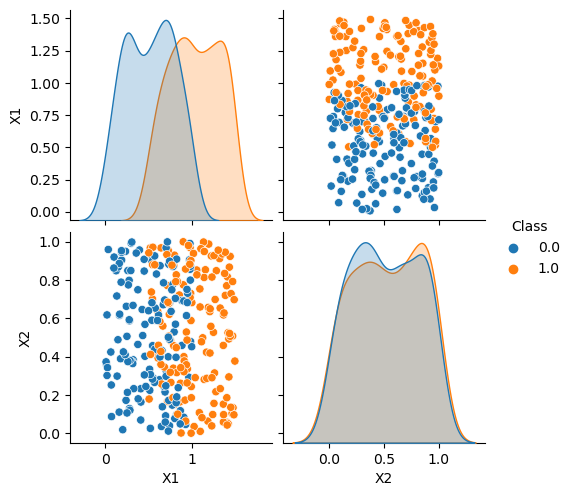

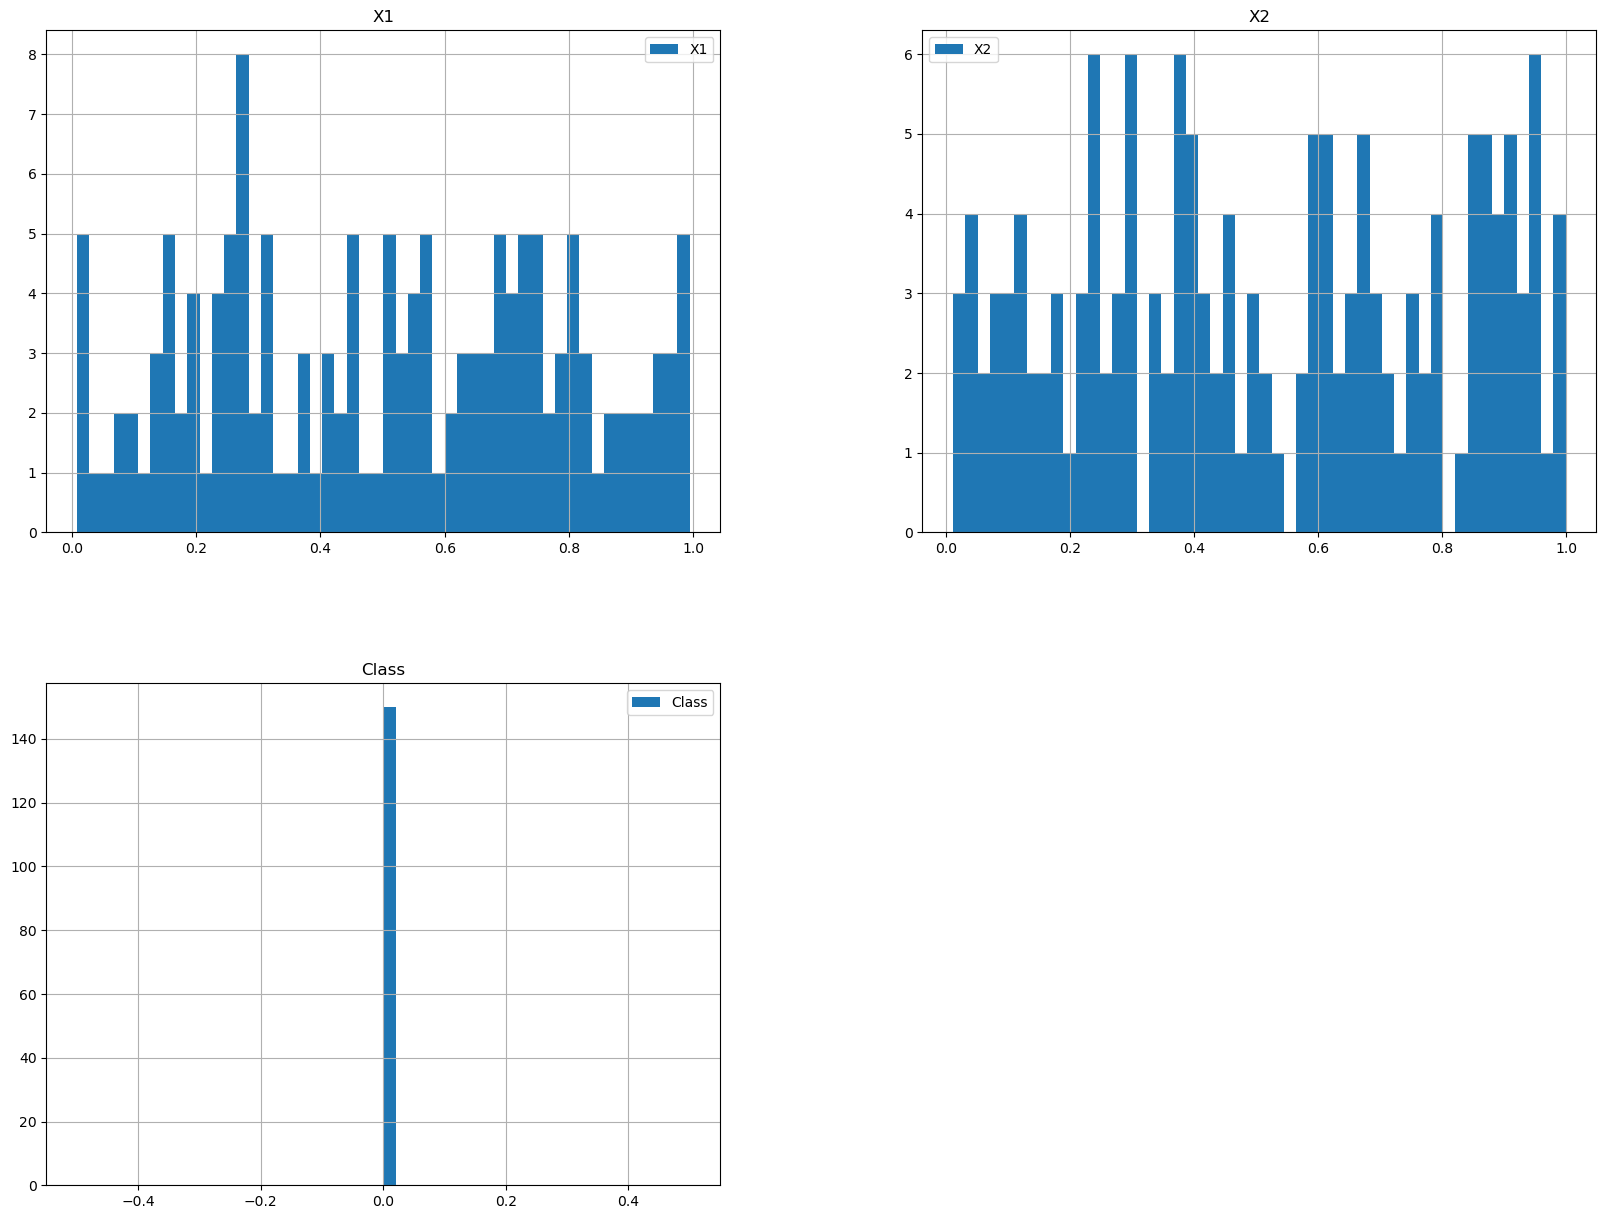

Covariance Class 1:
              X1        X2  Class
X1     0.082985 -0.009226    0.0
X2    -0.009226  0.091893    0.0
Class  0.000000  0.000000    0.0 



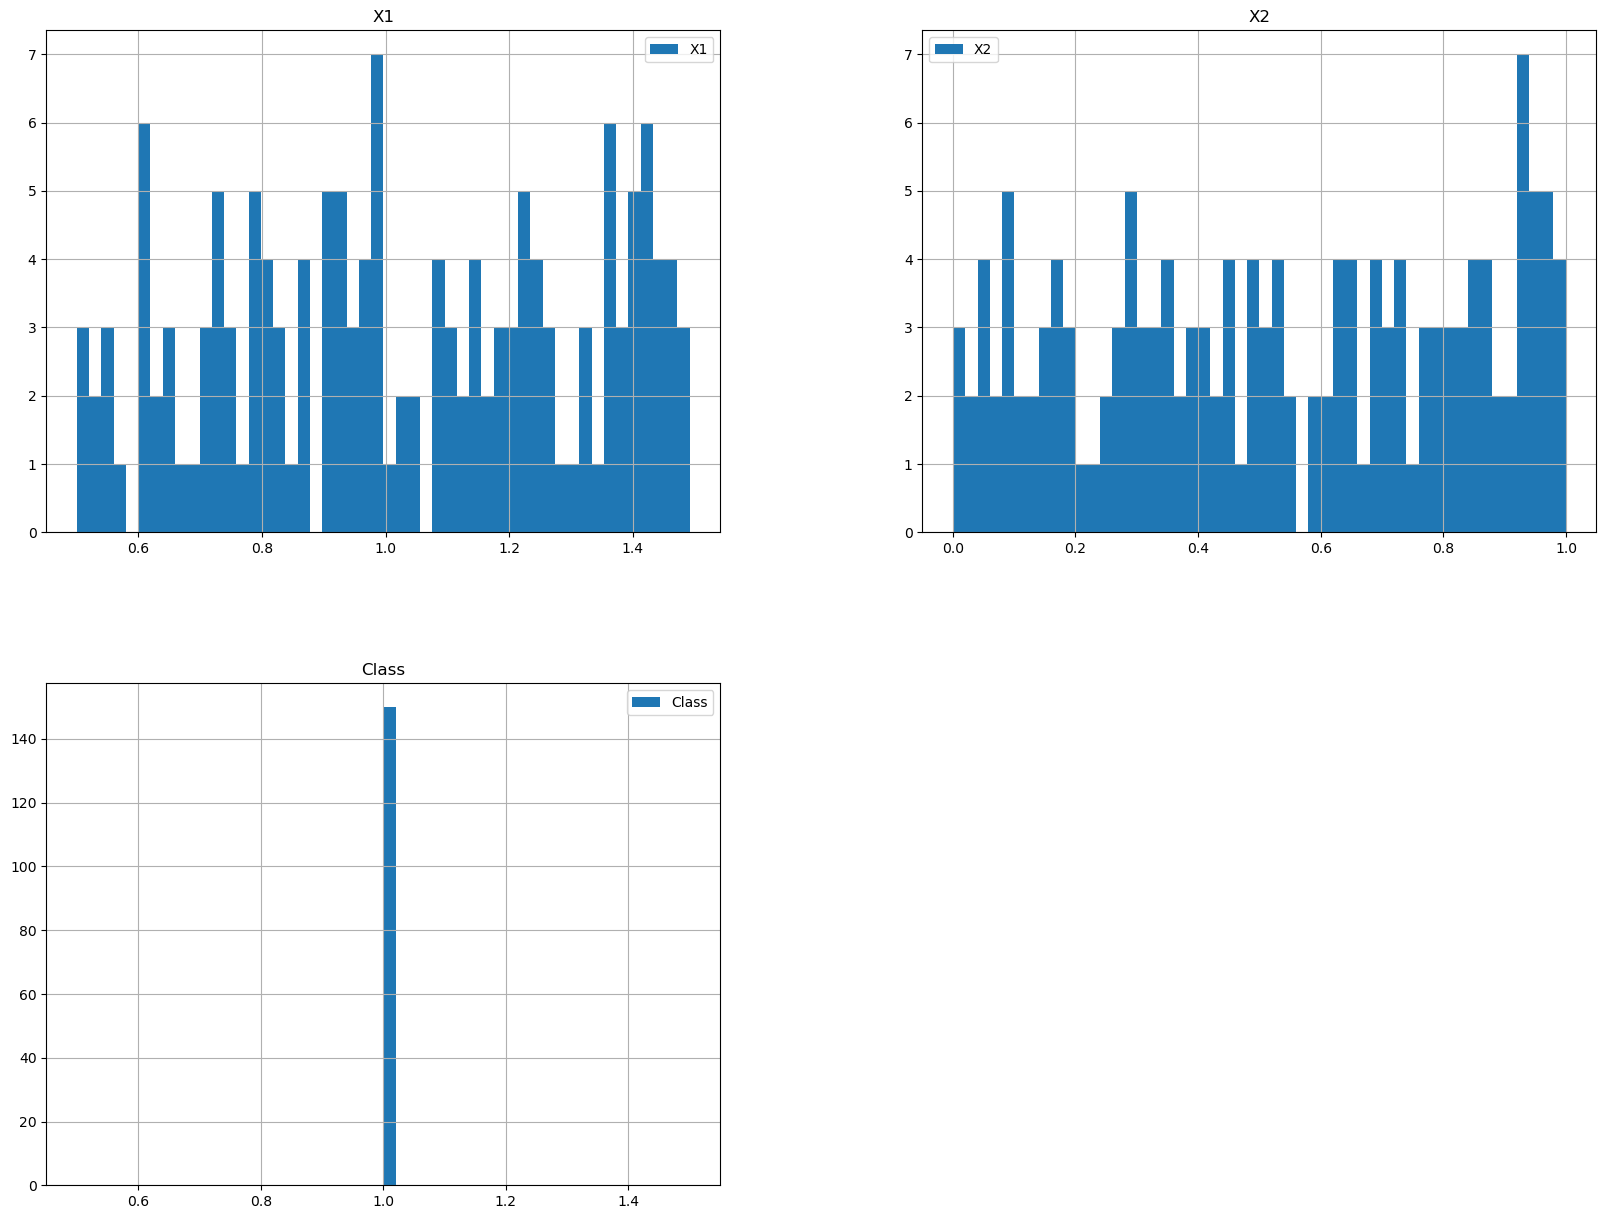

In [5]:
data_explore(df1_train)

## STEP 3 (DATASET 1): Discussion (STUDENT MARKDOWN RESPONSE REQUIRED)

In the markdown cell below, describe the data attributes you noticed during exploration of the training set 1.   

In particular, focus on the attributes which may facilitate classification or make classification of the data more challenging.  Hint:  look for differences in the statistics between classes.  Note that some differences might be for a specific features while other differences might involve both features.

<font color='green'>STUDENT ANSWER BELOW</font>   

<font color='green'> 
    <b>Faciliates classification:</b>
<ol>
    <li>There is a class-specific mean for $\overrightarrow{X}$ shown in histograms.</li>
    <li>There is a common class covariance matrix shown in covariance tables.</li>
    <li>Number of observations-$n$, is not too small at 300.</li>
    <li>Equal number of class observations.</li>
</ol>
</font>
<font color='green'>    
    <b>Make classification more challenging:</b>
<ol>
    <li>Dataset 1 is not normally distributed as see in histograms.</li>
    <li>Classes are considerably overlapping in pairs plot.</li>
    <li>X2 is is not very useful in distinguishing classes. 
</ol>
</font>
   



## STEP 4 (DATASET 2):  Load, Split and Explore Dataset 2 (STUDENT CODE)

Follow the steps on Dataset 2 as you did for Dataset 1.  Remember to only explore the training set (not the test set)
* Load the CSV for `dataset2.csv`
* Split the test and train data (stratified by class, with equal portions of the data going to each set)
* Call `data_explore` to explore the data

X1  description:
 count    300.000000
mean       0.459820
std        0.935519
min       -1.827196
25%       -0.187462
50%        0.457475
75%        1.077454
max        2.976019
Name: X1, dtype: float64 

X2  description:
 count    300.000000
mean       0.494059
std        0.561326
min       -0.819828
25%        0.018785
50%        0.514593
75%        0.971939
max        1.786571
Name: X2, dtype: float64 

Class  description:
 count    300.000000
mean       0.500000
std        0.500835
min        0.000000
25%        0.000000
50%        0.500000
75%        1.000000
max        1.000000
Name: Class, dtype: float64 

Covariance Class 0:
              X1        X2  Class
X1     0.615998  0.172814    0.0
X2     0.172814  0.101962    0.0
Class  0.000000  0.000000    0.0 



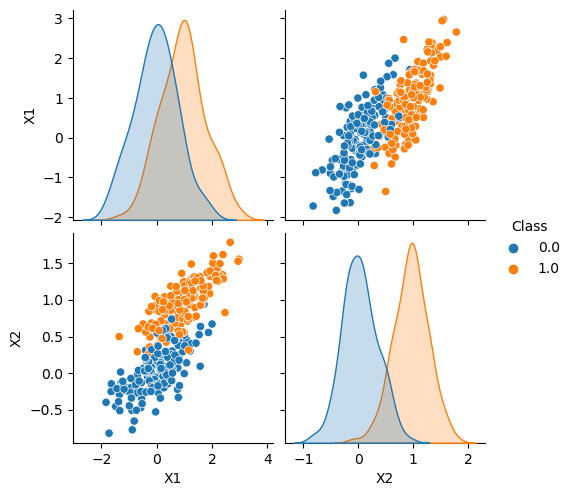

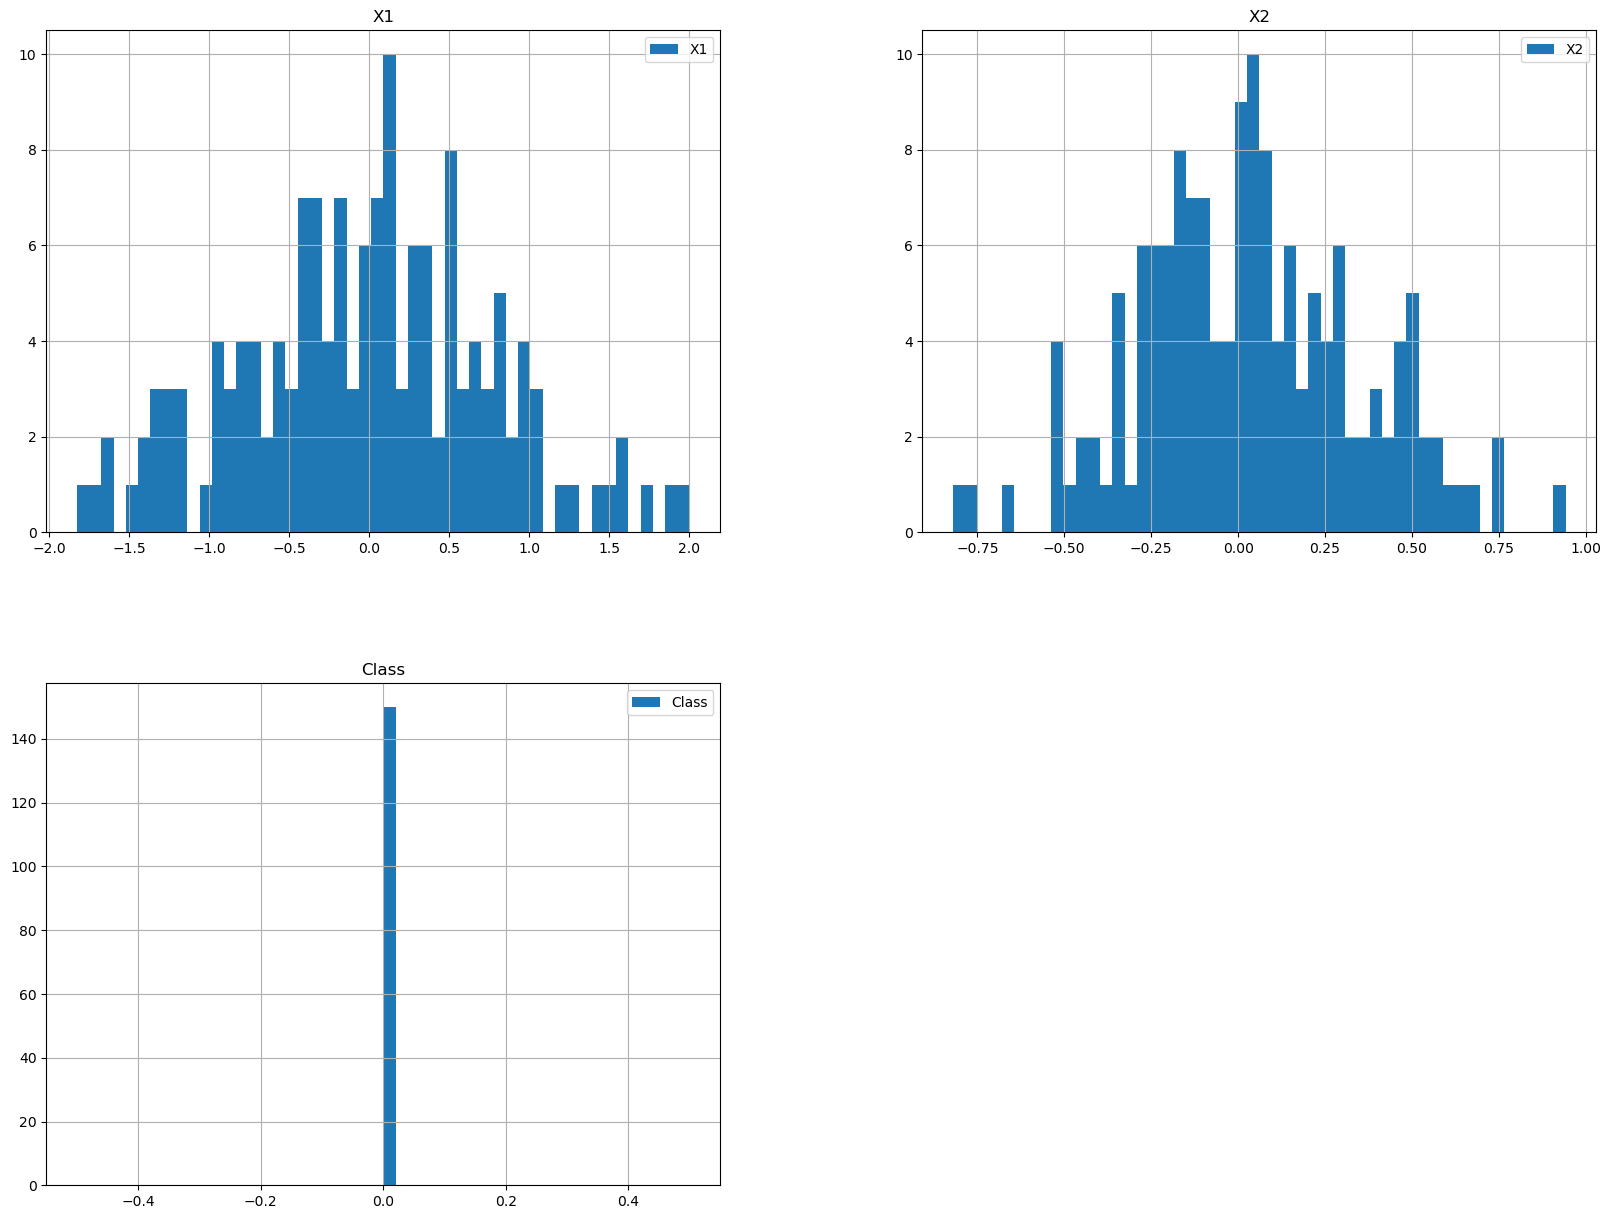

Covariance Class 1:
              X1        X2  Class
X1     0.664314  0.194578    0.0
X2     0.194578  0.100728    0.0
Class  0.000000  0.000000    0.0 



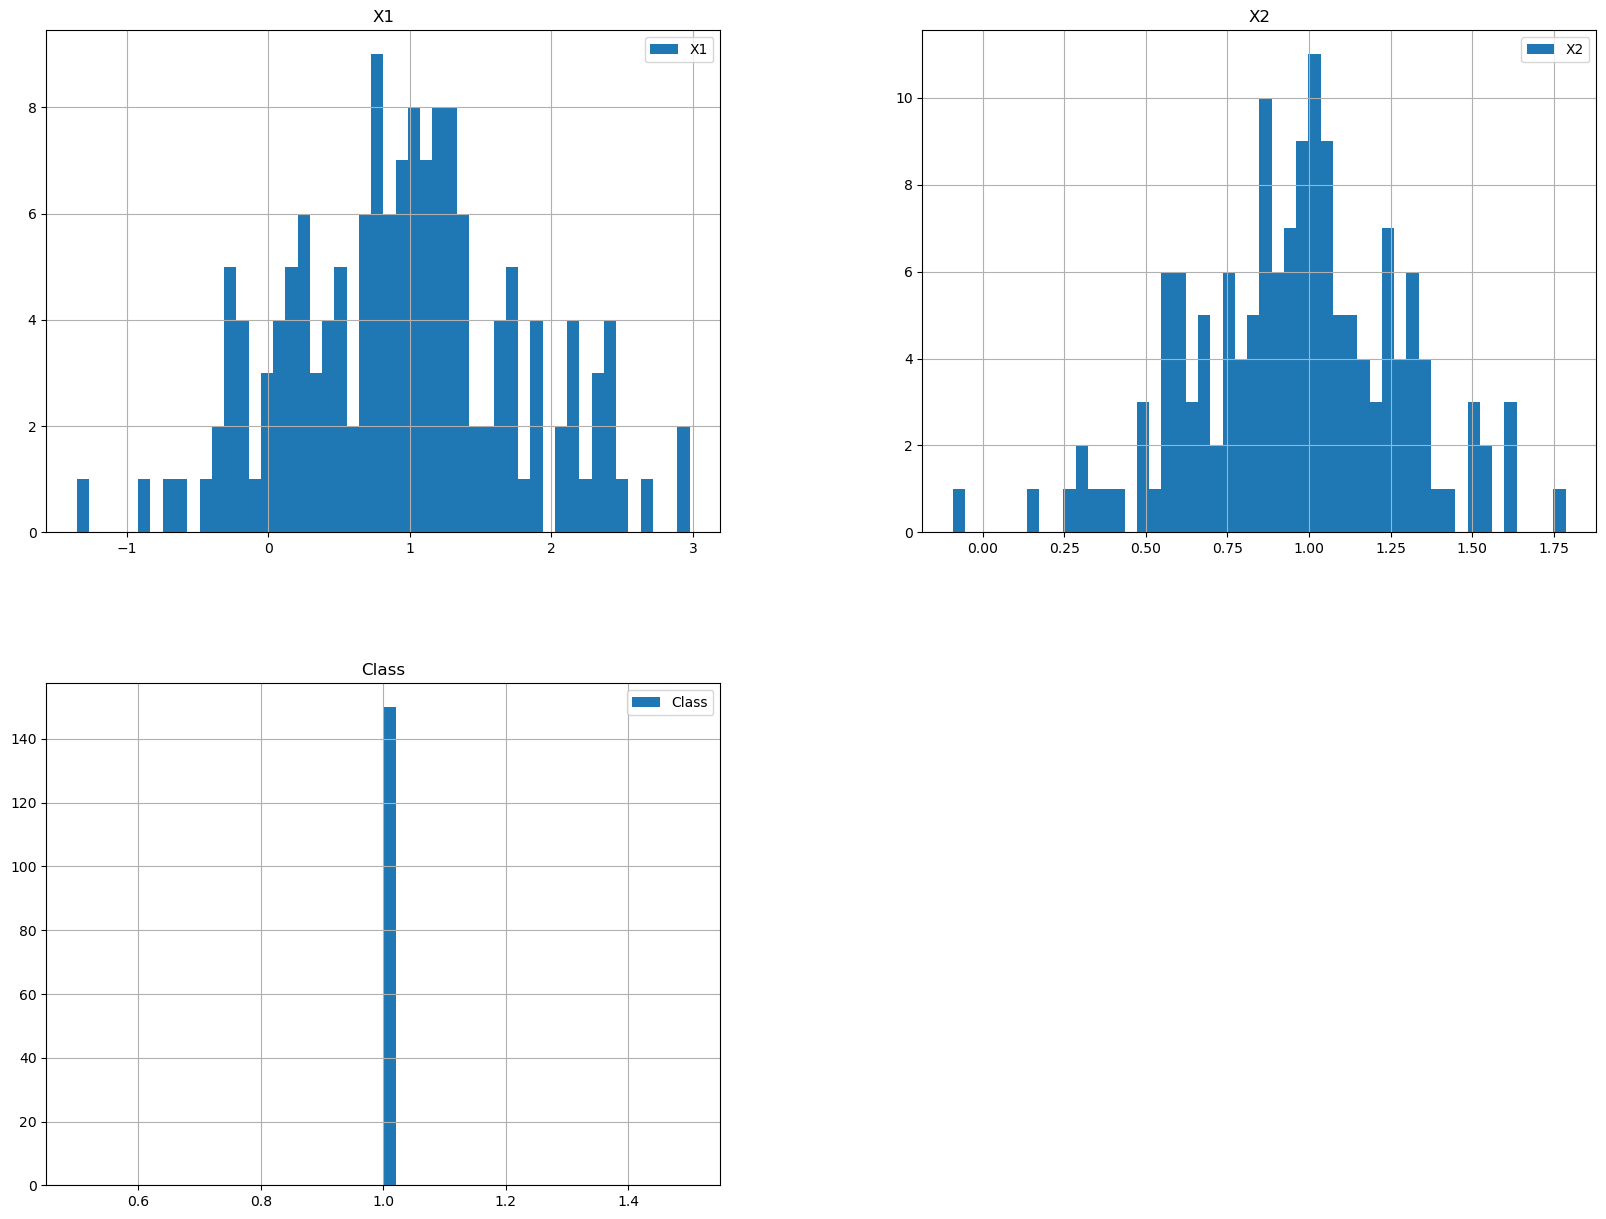

In [6]:
# STEP 4

#------------- START STUDENT CODE HERE -------------------

# Read in dataset2.csv
df2 = pd.read_csv("dataset2.csv", header=0, names=['X1', 'X2', 'Class'], index_col=0)

# Split data into two equal groups for training and testing maintaining class distributions
df2_train, df2_test = train_test_split(df2, test_size=0.5, random_state=randstate, stratify=df1['Class'])

# Explore data 
data_explore(df2_train)


#------------- END STUDENT CODE HERE -------------------


## STEP 5 (DATASET 2): Discussion (STUDENT MARKDOWN CELL)

In the markdown cell below, describe the data attributes you noticed during exploration of the training set 2.   

In particular, focus on the attributes which may facilitate classification or make classification of the data more challenging.  Hint:  look for differences in the statistics between classes.  Note that some differences might be for a specific features while other differences might involve both features.

<font color='green'>STUDENT ANSWER BELOW</font>   

<font color='green'> 
    <b>Faciliates classification:</b>
<ol>
    <li>There is a class-specific mean for $\overrightarrow{X}$ shown in histograms.</li>
    <li>There is a common class covariance matrix shown in covariance tables.</li>
    <li>Dataset 2 is normally distributed as see in histograms.</li>
    <li>Number of observations-$n$, is not too small at 300.</li>
    <li>Equal number of class observations.</li>
</ol>
</font>
<font color='green'>    
    <b>Make classification more challenging:</b>
<ol>
    <li>Classes are slightly overlapping as shown in pair plot. </li>
    <li>$X1$ is is not as useful in distinguishing classes as $X2$. 
</ol>
</font>
    

## STEP 6 (DATASET 3): Load, Split and Explore Dataset 3  (STUDENT CODE)

Follow the steps on Dataset 2 as you did for Dataset 1.  Remember to only explore the training set (not the test set)
* Load the CSV for `dataset3.csv`
* Split the test and train data (stratified by class, with equal portions of the data going to each set)
* Call `data_explore` to explore the data

X1  description:
 count    300.000000
mean       0.485577
std        3.671341
min      -11.007206
25%       -1.492858
50%        0.805101
75%        2.709781
max       12.062268
Name: X1, dtype: float64 

X2  description:
 count    300.000000
mean       2.419698
std        4.281530
min       -6.091856
25%       -0.482966
50%        1.570589
75%        5.045929
max       20.120173
Name: X2, dtype: float64 

Class  description:
 count    300.000000
mean       0.500000
std        0.500835
min        0.000000
25%        0.000000
50%        0.500000
75%        1.000000
max        1.000000
Name: Class, dtype: float64 

Covariance Class 0:
               X1        X2  Class
X1     22.354392  6.370066    0.0
X2      6.370066  5.859081    0.0
Class   0.000000  0.000000    0.0 



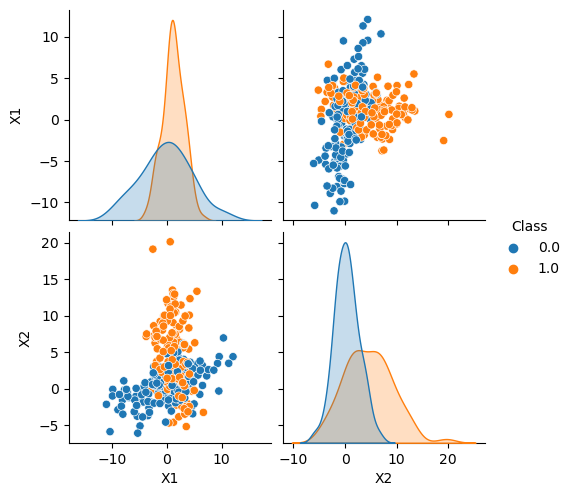

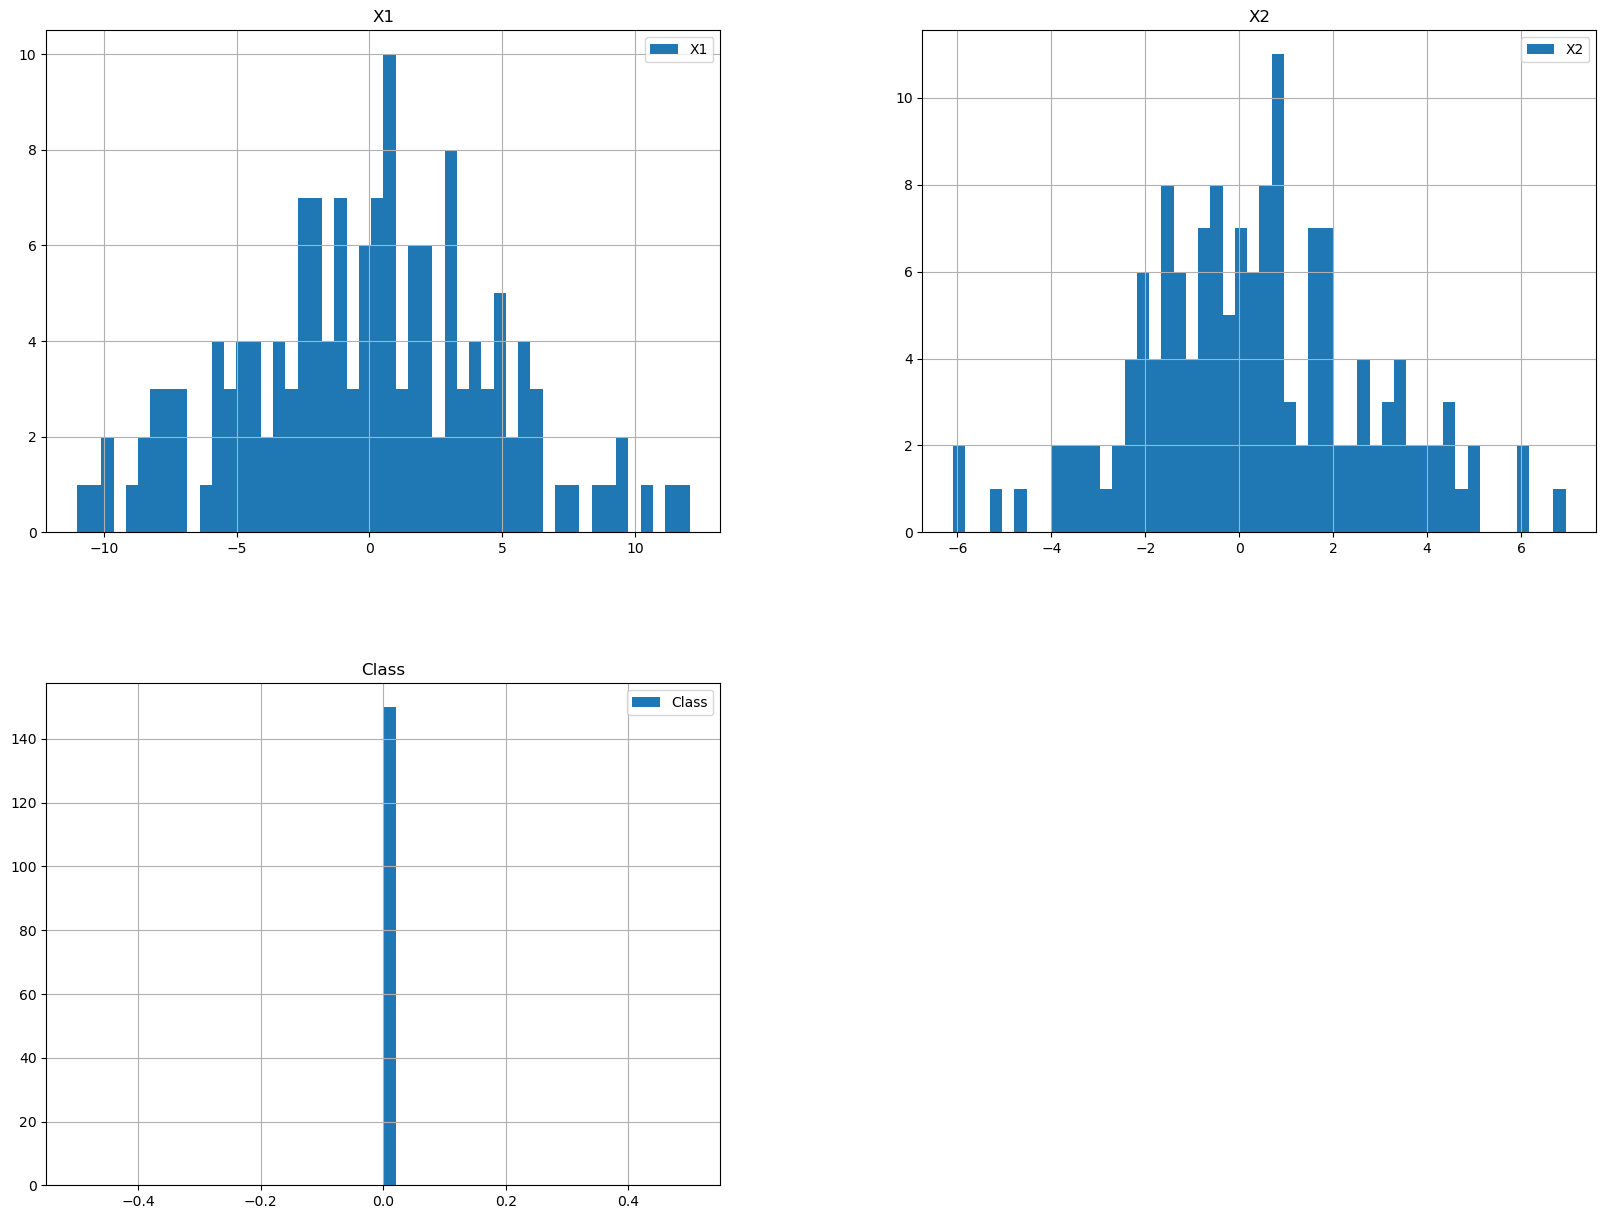

Covariance Class 1:
              X1         X2  Class
X1     3.857243  -2.150509    0.0
X2    -2.150509  21.868233    0.0
Class  0.000000   0.000000    0.0 



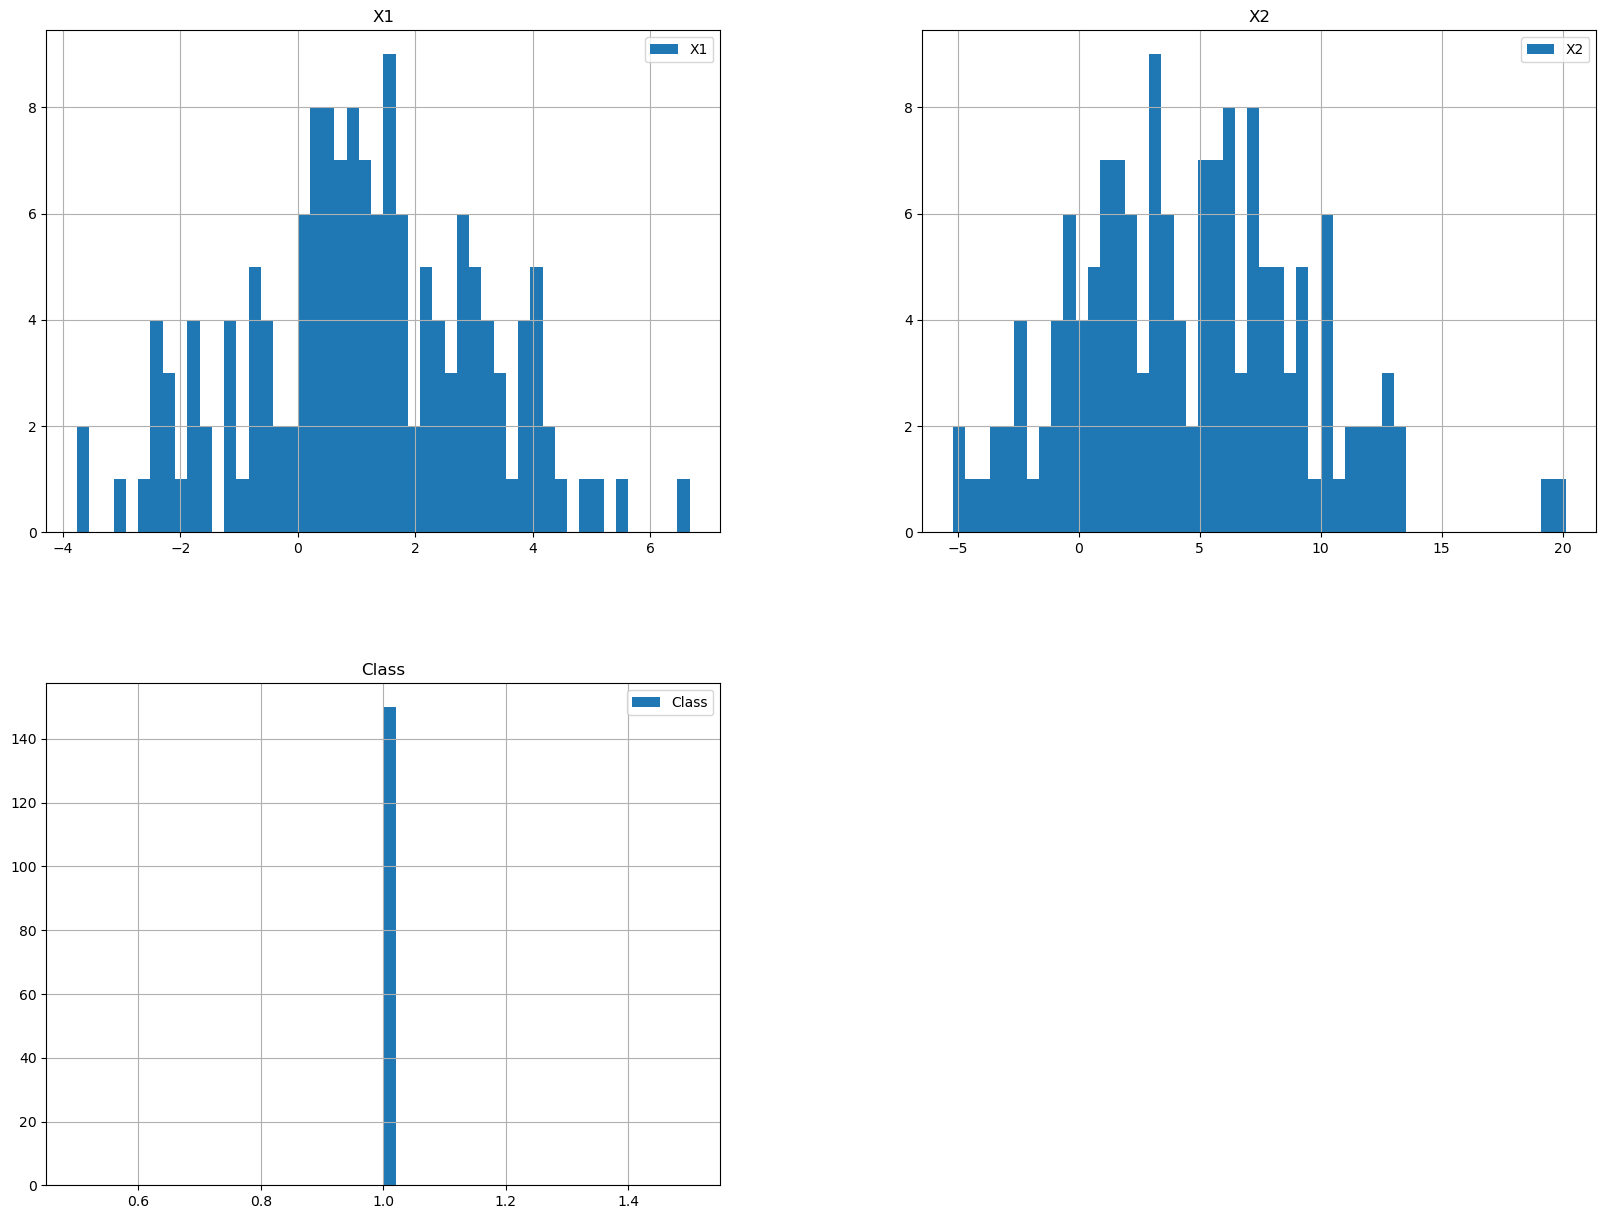

In [7]:
#STEP 6

#------------- START STUDENT CODE HERE -------------------
# Read in dataset2.csv
df3 = pd.read_csv("dataset3.csv", header=0, names=['X1', 'X2', 'Class'], index_col=0)

# Split data into two equal groups for training and testing maintaining class distributions
df3_train, df3_test = train_test_split(df3, test_size=0.5, random_state=randstate, stratify=df1['Class'])

# Explore data 
data_explore(df3_train)


#------------- END STUDENT CODE HERE -------------------


## STEP 7 (DATASET 3): Discussion (STUDENT MARKDOWN CELL)

In the markdown cell below, describe the data attributes you noticed during exploration of the training set.   

In particular, focus on the attributes which may facilitate classification or make classification of the data more challenging.  Hint:  look for differences in the statistics between classes.  Note that some differences might be for a specific features while other differences might involve both features.

<font color='green'>STUDENT ANSWER BELOW</font>   

<font color='green'> 
    <b>Faciliates classification:</b>
<ol>
    <li>There is a class-specific mean for $\overrightarrow{X}$ shown in histograms.</li>
    <li>Each class has its own covariance matrix shown in covariance tables (QDA assumption).</li>
    <li>Dataset 2 is normally distributed as see in histograms.</li>
    <li>Number of observations-$n$, is not too small at 300.</li>
</ol>
</font>
<font color='green'>    
    <b>Make classification more challenging:</b>
<ol>
    <li>Classes are considerably overlapped as shown in pair plot. </li>
    <li>Neither $X1$ or $X2$ are overly useful in distinguishing classes.
</ol>
</font> 

# PART 2 - Fitting Classification Models & Reporting Performance on the Test Set  (steps 8-12)


In this part, you will perform step 8 to obtain classification performance (accuracy) for each model on each of the datasets.

Then in steps 9-11 you will focus on dataset 3 to produce confusion matrices and ROC curves on just dataset 3

Finally, in step 12 you will draw some conclusions about the performance of the models and make recommendations.



### Fitting Classifiers (INSTRUCTOR-PROVIDED CODE)

In this code, we use a function to train 3 models (Logistic Regression, Linear Discriminant Analysis, and Quadratic Discriminant Analysis) on each of the three datasets (9 models total).  

In [8]:
def build_classifiers(data):
    X = data.loc[:,['X1', 'X2']]
    y = data.Class
    log_reg = LogisticRegression(solver='lbfgs')
    log_reg.fit(X, y)
    
    lda = LinearDiscriminantAnalysis()
    lda.fit(X, y)
    
    qda = QuadraticDiscriminantAnalysis()
    qda.fit(X, y)
    
    return {'Logistic_Regression':log_reg, 'LDA':lda, 'QDA':qda}

In [9]:
models1 = build_classifiers(df1_train)  #contains one model for each type of classifier on dataset 1
models2 = build_classifiers(df2_train)
models3 = build_classifiers(df3_train)

The models are returned in a python dictionary can be accessed using the (key, model) accessors like these examples:
* `models1['Logistic_Regression']` returns the Logistic Regression model that was fit on dataset 1
* `models3['LDA']` returns the LDA model that was fit on dataset 3
* `models2['QDA']` returns the QDA model that was fit on dataset 2

Recall that 
* the Logistic Regression model is `sklearn.linear_model.LogisticRegression.fit()`
* the LDA model was fit using `sklearn.discriminant_analysis.LinearDiscriminantAnalysis.fit()`
* the QDA model was fit using `sklearn.discriminant_analysis.QuadraticDiscriminantAnalysis.fit()


For each dataset, for each model, determine the class prediction probabilities using `.predict_proba()` on the features from the dataset provided to the function (X)

## STEP 8:  Determining classifier Accuracy (STUDENT CODE REQUIRED)

For each of the models above, for each test dataset, report Accuracy on the test set:

Report this in a table format by storing the values in the columns and rows of a new dataframe and then displaying the dataframe
* use a separate row for each dataset
* use a separate column for each model's performance

Hint:  use `sklearn.metrics.accuracy_score` for this activity


In [10]:
#STEP 8

accdf = None #placeholder for the dataframe which will contain performance scores

#------------- START STUDENT CODE HERE -------------------

# Set dataframes names for use on building the table
df1_test.name = "Dataset 1"
df2_test.name = "Dataset 2"
df3_test.name = "Dataset 3"

def get_mod_acc(fit_mods, datasets):
    df_out = None
    
    #create table to populate
    df_out = df = pd.DataFrame({
        'Dataset':[],
        'Logistic Regression':[],
        'Linear Discriminant Analysis':[],
        'Quadradic Discriminant Analysis':[]
        })

    # Track the idx for model list
    mod_idx = 0
    
    for ds in datasets:
        #print(ds)
        # Get our Xs and ys
        X = ds.drop("Class", axis=1)
        y = ds["Class"]
    
        # Get predictions per fitted model
        lg_pred = fit_mods[mod_idx]['Logistic_Regression'].predict(X)
        lg_scr = accuracy_score(y, lg_pred)

        lda_pred = fit_mods[mod_idx]['LDA'].predict(X)
        lda_scr =  accuracy_score(y, lda_pred)

        qda_pred = fit_mods[mod_idx]['QDA'].predict(X)
        qda_scr = accuracy_score(y, qda_pred)
        
        # add the row of scores to our data frame
        df_out.loc[len(df_out.index)] = [ds.name,lg_scr,lda_scr,qda_scr] 
        mod_idx +=1
    
    return df_out

# get df for accuracy for each model on test data set
accdf = get_mod_acc(fit_mods = [models1, models2, models3],
                    datasets = [df1_test, df2_test, df3_test])
      
#------------- END STUDENT CODE HERE -------------------

accdf.head()
        

,Dataset,Logistic Regression,Linear Discriminant Analysis,Quadradic Discriminant Analysis
0,Dataset 1,0.740000,0.740000,0.736667
1,Dataset 2,0.960000,0.956667,0.960000
2,Dataset 3,0.726667,0.723333,0.806667


## STEP 9:  Confusion Matrix (STUDENT CODE REQUIRED)

In Dataset 3, there was a meaningful difference in performance between the models.  

For each model (logistic regression, LDA, QDA), create a confusion matrix of its performance on test dataset 3
* Tip:  use `sklearn` `ConfusionMatrixDisplay`
* The True label should identify the rows of the matrix while the predicted label identifies the columns
* Ensure each matrix is properly titled with the name of the model used to create it

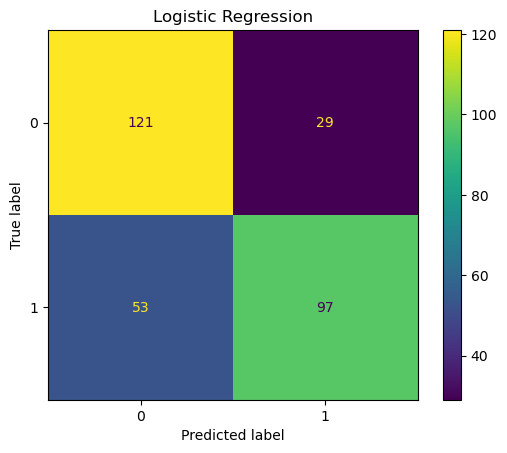

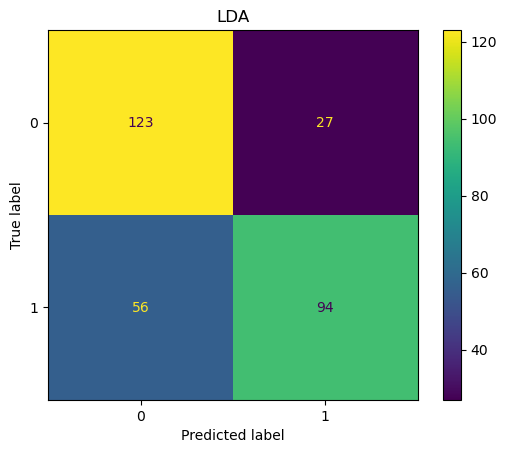

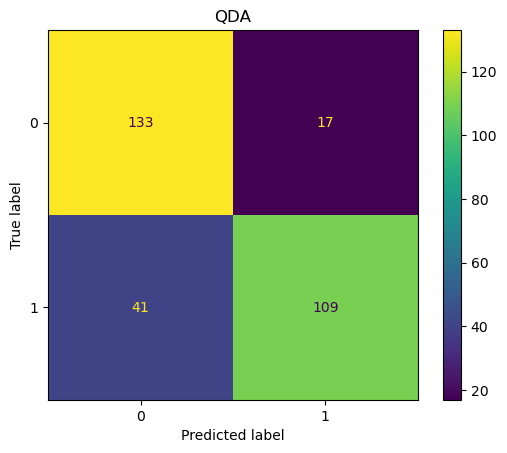

In [11]:
# STEP 9

#------------- START STUDENT CODE HERE -------------------
X = df3_test.loc[:,['X1', 'X2']]
y = df3_test.Class

#Create confusion matrix for each model
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y, models3['Logistic_Regression'].predict(X)))
disp.plot()
plt.title("Logistic Regression")
plt.show()

disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y, models3['LDA'].predict(X)))
disp.plot()
plt.title("LDA")
plt.show()

disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y, models3['QDA'].predict(X)))
disp.plot()
plt.title("QDA")
plt.show()

#------------- END STUDENT CODE HERE -------------------


### Function to use a classifier to estimate class probabilities on a dataset (INSTRUCTOR PROVIDED CODE)

In later code cells this function will be called with each dataset and the 3 models used to fit models to that dataset. It relies on the `sklearn` model's `.predicte_proba` function.  

In [12]:
def predict_probs(models, X):
    """ Returns a dictionary of predicted proability vectors using models stored in the input dictionary 'models' on the feature data 'X'
    params:  
    models - a dictionary of fitted classification models with key equal to the name of the model
    X - the values of a dataset obtained"""
    predicts = {}
    
    for key, model in models.items():
        predicts[key] = model.predict_proba(X)
    return predicts

## STEP 10: Call the `predict_probs` function to estimate class probabilities on each test set (STUDENT CODE REQUIRED)

Using the instructor-provided `predict_probs(models, X)` function, obtain the dictionary of predicitons of each classifier on the results of each of the 3 test datasets.  

Store the returned dictionary of predictions in `predicts1`, `predicts2`, and `predicts3` (1 dictionary per dataset)

Hint:  to obtain the parameter `X` for the input value to the function, use the `pandas` dataframe accessor `datasetname.loc[:,['X1','X2']]` where `datasetname` is the name of a test set dataframe like `df1_test`


In [13]:
#STEP 10

predicts1 = {} #placeholder for predictions of each of the three models on test dataset 1
predicts2 = {} #placeholder for predictions of each of the three models on test dataset 2
predicts3 = {} #placeholder for predictions of each of the three models on test dataset 3

#------------- START STUDENT CODE HERE -------------------

# Predict probs for all models
predicts1 = predict_probs(models1, df1_test.loc[:,['X1','X2']])

predicts2 = predict_probs(models2, df2_test.loc[:,['X1','X2']])

predicts3 = predict_probs(models3, df3_test.loc[:,['X1','X2']])

#------------- END STUDENT CODE HERE -------------------


In [14]:
# instructor code  - spot check model predictions
print("logistic regression\n", predicts1["Logistic_Regression"][0:5] )
print("LDA\n",predicts3["LDA"][0:5] )
print("QDA\n",predicts2["QDA"][0:5] )

#'Logistic_Regression':log_reg, 'LDA':lda, 'QDA':qda

logistic regression
 [[0.19735661 0.80264339]
 [0.71184881 0.28815119]
 [0.93660551 0.06339449]
 [0.56446774 0.43553226]
 [0.79840453 0.20159547]]
LDA
 [[0.93669617 0.06330383]
 [0.22169728 0.77830272]
 [0.71072602 0.28927398]
 [0.32569998 0.67430002]
 [0.60366239 0.39633761]]
QDA
 [[1.27359314e-04 9.99872641e-01]
 [1.68270363e-02 9.83172964e-01]
 [9.97992191e-01 2.00780910e-03]
 [8.43602791e-01 1.56397209e-01]
 [9.96918807e-01 3.08119281e-03]]


## STEP 11:  Create ROC Curves for each test dataset (STUDENT CODE REQUIRED)

For each of the three test datasets, display a single ROC curve with each of the three model performances on it.  You should show one graph per dataset, and on each graph, include the ROCs for each of the three models on the graph, using colored lines with legends.

Each graph should have:
* A title which includes the name of the dataset
* The horizontal axis label should contain the words "False Positive Rate"
* The vertical axis label should contain the words "True Positive Rate"
* One ROC line per model, with the legend appropriately named

Assume that Class "1" is the postive class for this activity

Hint:  See `sklearn.metrics` `RocCurveDisplay.from_predictions` which will provide the curves and the AUC for each ROC line.  To use this, you will need to provide 
* The correct class for each observation, as contained in the test dataset 'Class' column. 
* The probabilities for the positive class obtained from the `predict_probs` of the model of interest.  This is located in column index = 1  (the right column)
* The `pos_label` Class identifier - which is 1 since we are assuming 1 is the positive class
* The `name` for the ROC line which should be a descriptive name of the classfier model used to produce the line


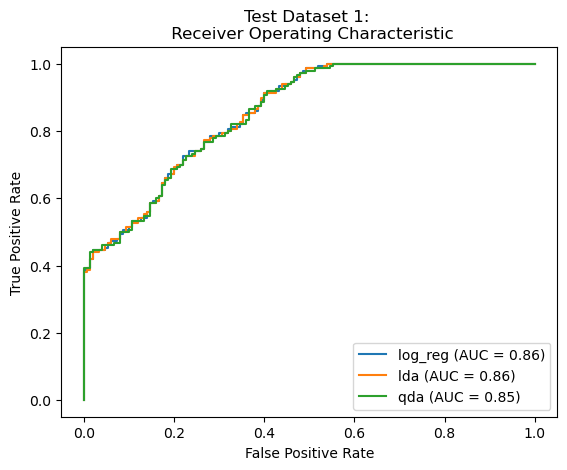

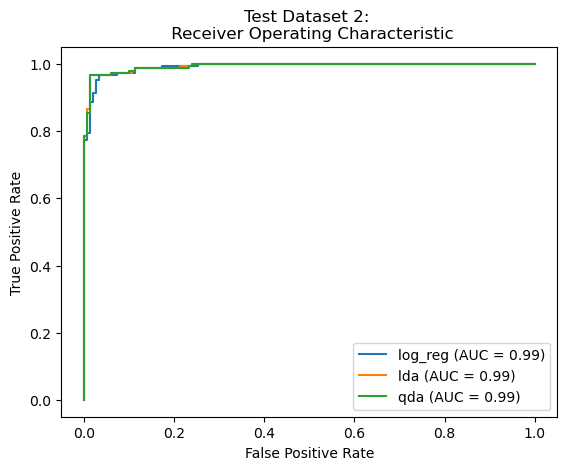

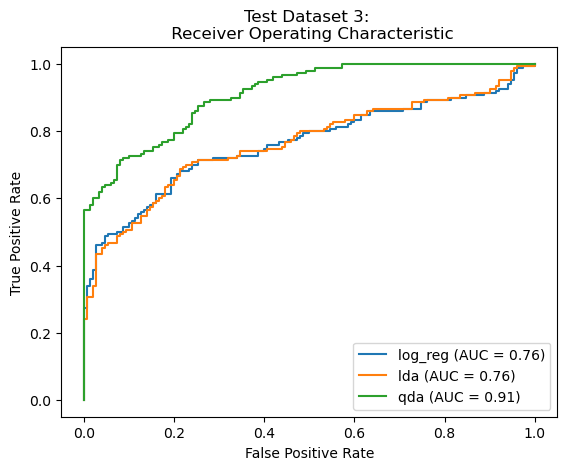

In [15]:
#STEP 11

# model names:  'Logistic_Regression':log_reg, 'LDA':lda, 'QDA':qda

for test_predicts,test_dataset, df_names in zip([predicts1, predicts2, predicts3],[df1_test,df2_test,df3_test],['Test Dataset 1','Test Dataset 2', 'Test Dataset 3']):
    
    #------------- START STUDENT CODE HERE -------------------
    
    #get true prediction results
    y_true = test_dataset['Class'].to_numpy()
    
    # Log Rec ROC 
    RocCurveDisplay.from_predictions(y_true, test_predicts['Logistic_Regression'][:, 1], pos_label=1,ax=plt.gca(), name="log_reg")
    
    # LDA ROC 
    RocCurveDisplay.from_predictions(y_true,  test_predicts['LDA'][:, 1], pos_label=1, ax=plt.gca(), name="lda")
        
    # QDA ROC 
    RocCurveDisplay.from_predictions(y_true, test_predicts['QDA'][:, 1], pos_label=1, ax=plt.gca(), name="qda")
   
    # Add legend 
    plt.legend()
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    
    # Add title
    tempt = df_names
    plt.title(df_names + ": \n Receiver Operating Characteristic")
    #print(str(df_names) + "\n Receiver Operating Characteristic")
    
    # Display plot
    plt.show()
    
    #------------- END STUDENT CODE HERE -------------------

    

## STEP 12 - Conclusions from the ROC Curves (STUDENT MARKDOWN RESPONSE REQUIRED)

Review the ROC Curves resulting from step 11 and answer the following quesions:

Q1:  For which datasets (1, 2, and 3) does it matter which model we choose to make predictions, and what evidence supports this?

Q2:  For the dataset(s) which matter(s) (from the set {1,2,3}), which models are the best to choose, and why?

<font color='green'>STUDENT ANSWER Q1 BELOW</font>   

<font color='green'><b>Dataset 3</b> is most impacted by the choice of model. As shown in step 11, Figure "Test Dataset 3: Receiver Operating Characteristic", the area under the curve (AUC) is 15% greater than Logistic Regression or LDA. Of the models considered, QDA is the best model to apply because observations are normally distributed, there is a class specific mean vector for $\overrightarrow{X}$, and each class has its own covariance matrix. 

<font color='green'>STUDENT ANSWER Q2 BELOW</font>   



     
<font color='green'>In order of how much model selection matters:</font>
  
<ol>
<font color='green'>    <li> Dataset 3 is the most impacted by the selection of model. Since dataset 3 meets the assumptions of QDA, that is obseravtions are normally distributed, there is a class specific mean, and each class has its own covariance, we expect it would perform better than Logistic Regression or LDA. As displayed in step 11, QDA clearly out performs and should be selected. 
    </li>
    <li> Dataset 1 has about the same performance for all models, but I would select Logistic Regression instead of the LDA and QDA because observations within each class are far from normal distribution--an assumption of both LDA and QDA.
    </li>
    <li> Dataset 2 has approximately the same performance for all models, so I would likely select QDA or LDA since this dataset meets the assumptions of class normal distribution with a class-specific mean and a common variance. 
    </li></font>

</ol>


    